# Assignment 2: Clustering California Housing with K-means

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
"Tonight, more than 130,000 Californians will go to sleep homeless. That’s enough to fill Dodger Stadium, AT&T Park and Petco Park. The biggest culprit is rising housing costs. From 2000 to 2014, median rent in California increased by more than one-third, while real incomes for renters fell by 7 percent. Today, 1.5 million Californians spend more than half their income on housing. This crisis threatens not just low-income families but our entire economy, driving businesses to relocate to states in which their employees can afford to live. - **Business Insider, Sep 2018.**"

![Half of the homes in San Franciso is now one million or above](https://www.travelinusa.us/wp-content/uploads/sites/3/2017/11/Painted-Ladies-San-Francisco-01.jpg).

In this assignment, you will attempt to cluster the California Housing by implementing and analyzing the k-means algorithm to the data. K-Means is one of the most popular clustering algorithms. K-means stores k-centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid. For references, you may refer to my lecture on K-means or Chapter 2 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit this Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.

**Note**: In order for your assignment to be graded, you must save your Notebook filename under this format: **yourUvaUserId_assignment_2_kmeans.ipynb**.


---
## 1. PRE-PROCESSING THE DATA (10 pts)

Download the California Housing dataset from the below link. This dataset includes statistics about the median income, median age, average number of rooms per person, average number of persons in a household etc. The statistics were gathered per geographical block.

**Data Acquiring:** Download the dataset from https://www.kaggle.com/camnugent/california-housing-prices

**Data Discovery, Visualization, and Cleaning:** Fortunately, this step have been given to you from chapter 2. However, you should review them and write the code necessary for the purposes of this assignment.

In [1]:
# You might want to use the following package
from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Your code goes here for this section.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
housing = pd.read_csv("housing.csv")
housing.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


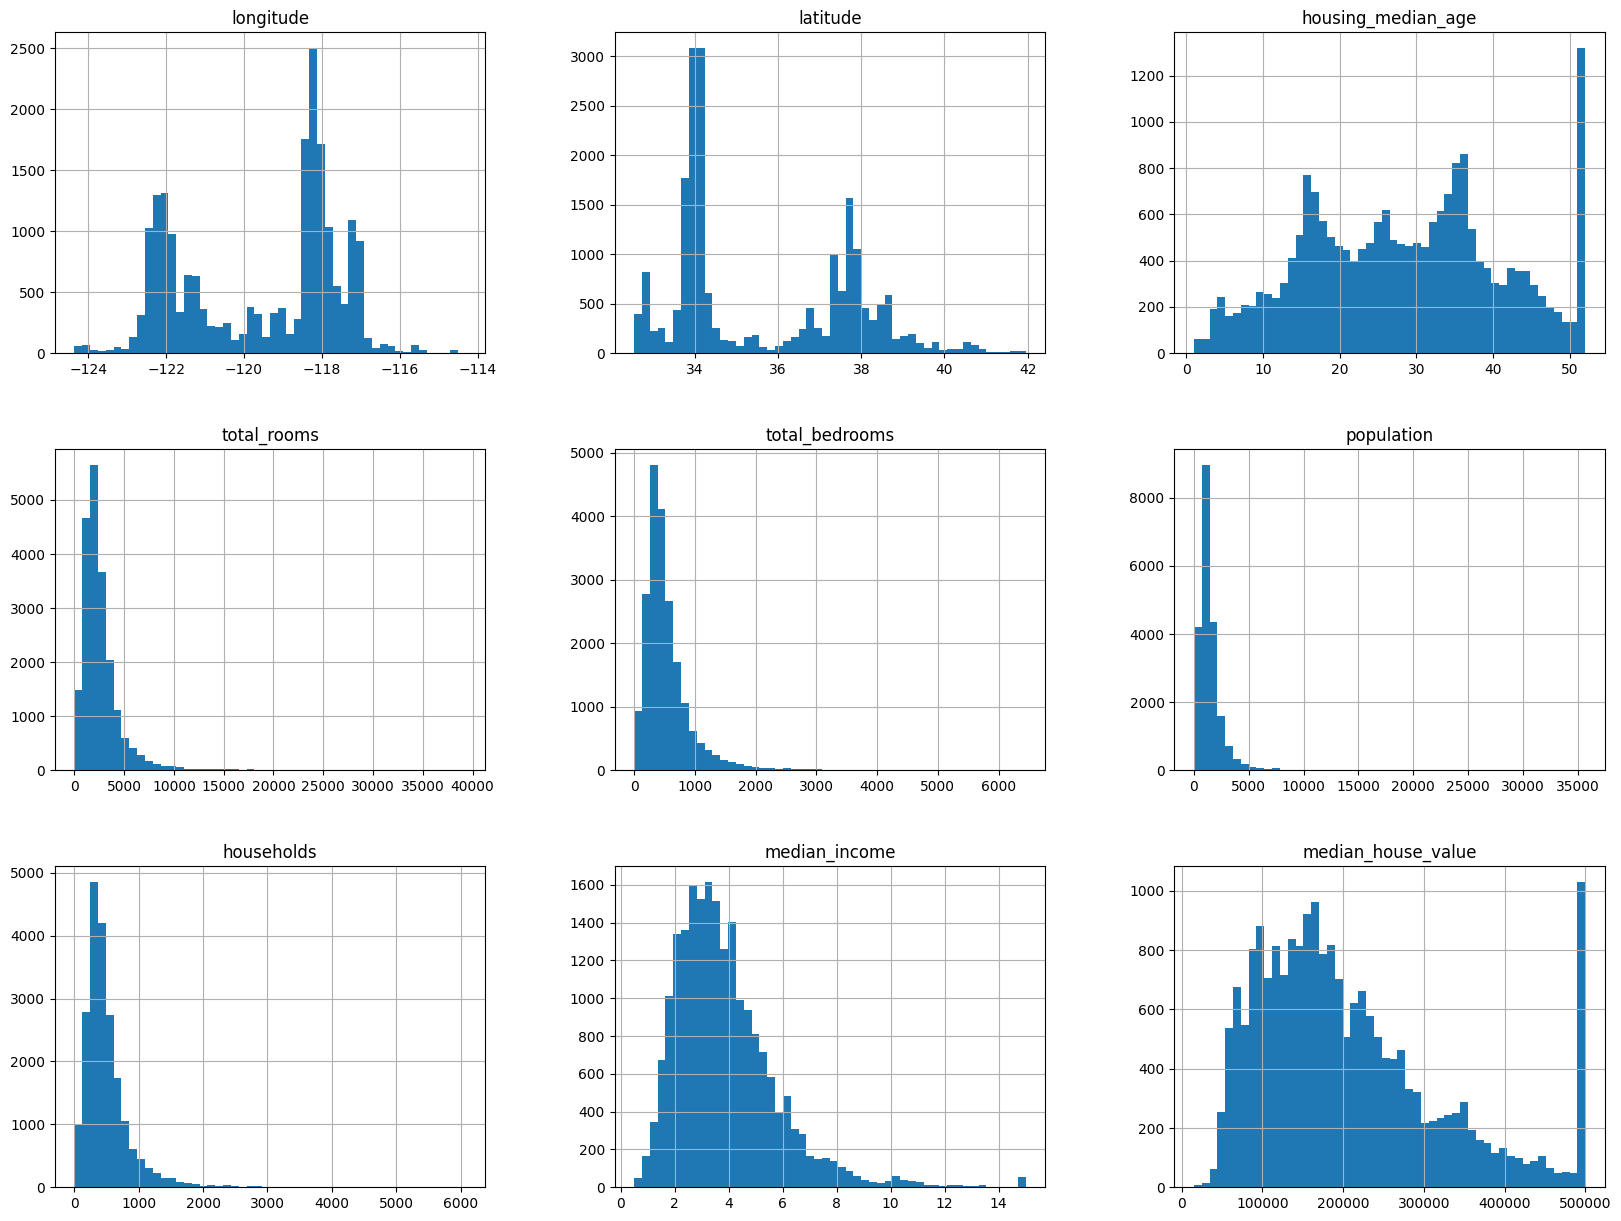

In [6]:
%matplotlib inline
housing.hist(bins=50, figsize=(20,15))
plt.show()

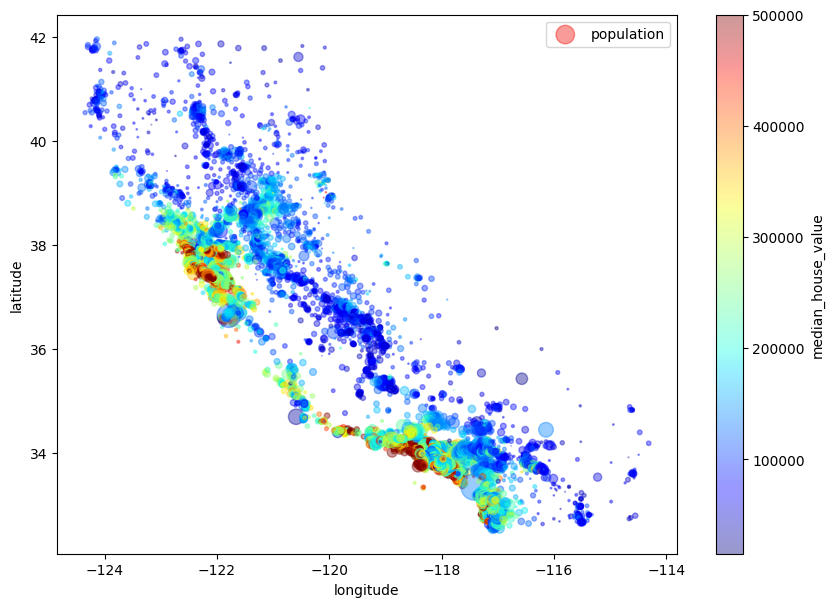

In [7]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [8]:
numerical_housing = housing.select_dtypes(include=[np.number])
categorical_housing = housing.select_dtypes(include=[object])

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_attribs = list(numerical_housing)
cat_attribs = list(categorical_housing)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs)
    ])

In [22]:
housing_prepared = full_pipeline.fit_transform(housing)
print(housing.shape)
print(housing_prepared.shape)

(20640, 10)
(20640, 14)
[[-1.32783522  1.05254828  0.98214266 ...  0.          1.
   0.        ]
 [-1.32284391  1.04318455 -0.60701891 ...  0.          1.
   0.        ]
 [-1.33282653  1.03850269  1.85618152 ...  0.          1.
   0.        ]
 ...
 [-0.8237132   1.77823747 -0.92485123 ...  0.          0.
   0.        ]
 [-0.87362627  1.77823747 -0.84539315 ...  0.          0.
   0.        ]
 [-0.83369581  1.75014627 -1.00430931 ...  0.          0.
   0.        ]]


- - -
## 2. IMPLEMENTING K-MEANS (40 pts)

You must implement your own version of K-Means Algorithm. Input a cluster count K and M data points each with its own vector of N features, along with the choice of a distance measure; then:

1. Initialize K centroids. In our case, a centroid is just the average of all data in a cluster.
2. Assign each data point to the cluster that has the closest centroid base on a **distance measure** below.
3. After all data points have been assigned to clusters, recalculate the centroids for each cluster (as averages of all points in the cluster).
4. Repeat the data assignments and centroid calculations until no change in housing assignment occurs between iterations.

**Distance Measures:** Your implementation must include three distance metrics: Manhattan Distance, Euclidean Distance, Sup Distance. These 3 distance metrics can be generalized by the Minkovski Distance:
$D(\mathbf{x},\mathbf{y}) = \sqrt[\leftroot{2}\uproot{2}p]{\sum\limits_{i=1}^n|x_i - y_i|^p}$ where $p=1$ for Mahattan, $p=2$ for Euclidean, and $p=\infty$ for Sup Distance.

**Implementation Notes:** Note that your functions should return distance measures; that is, the returned value should be high if the two vectors are dissimilar, low if they are similar, and zero if they are completely identical.

In [51]:
# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).

class MyKMeans:

  def __init__(self, k, distance_measure=2):
    self.k = k
    if distance_measure == 1 or distance_measure == 2 or distance_measure == float("inf"):
      self.distance_measure = distance_measure
    else:
      raise Exception("Invalid distance measure, accepts 1, 2, or float('inf')")
    self.clusters = []
    self.centroids = []

  def get_distance(self, x, y):
    match self.distance_measure:
      case 1:
        return self.manhattan_distance(x, y)
      case 2:
        return self.euclidean_distance(x, y)
      case float("inf"):
        return self.sup_distance(x, y)

  def manhattan_distance(self, x, y):
    return np.sum(np.abs(x - y))

  def euclidean_distance(self, x, y):
    return np.sqrt(np.sum(np.square(x - y)))

  def sup_distance(self, x, y):
    return np.max(np.abs(x - y))

  def fit(self, X):
    self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]

    while True:
      cur_centroids = self.centroids.copy()

      distances = np.array([[self.get_distance(x, y) for y in self.centroids] for x in X])
      self.clusters = np.argmin(distances, axis=1)

      for i in range(self.k):
        self.centroids[i] = np.mean(X[self.clusters == i], axis=0)

      if np.array_equal(cur_centroids, self.centroids):
        break
    return self.centroids, self.clusters

  def get_sse(self, X):
    sse = 0
    for i in range(X.shape[0]):
      sse += self.get_distance(X[i], self.centroids[self.clusters[i]]) ** 2
    return sse


- - -
## 3. CLUSTERING HOUSING INTO REGIONS (40 pts)

Now that you have implemented the K-Means as the clustering algorithm. Applying the algorithm for k=2 clusters to see if you can split California into a Northern and Southern regions.

* **Cluster the data:** Report the SSE (sum squared error), cluster means, within cluster standard deviations for each attribute, etc. Visualize the clustering by plot the latitude along the X axis and longitude along the Y axis. You should get a plot that looks roughly in the shape of California (see Chapter 2 for more details). Using the cluster means and std. deviations as representative values in the cluster, what can you say about the clusters that were found? How do they compare with what you know about cities and areas in California? What can you attribute the gaps to? It will definitely be helpful to have a map of California handy.

* **Change the number of clusters:** Increase the value of k from 2 to 3,4,..,10 and repeat the clustering process above. Record cluster means and standard deviations. When you change k, do any additional patterns emerge? If so, what are they? Applying the algorithm for 10 clusters to see if it clearly identified the silicon valley area as one cluster (where houses are relatively new and expensive, median income is high), the area of San Francisco as another etc. While SF and Silicon Valley may have a somewhat similar profile (at least, compared with mid CA), they were separated mainly due to the latitude/longtitue properties, that involve a dimension of geographical cohesiveness.

* **Plot the SSE over different number of cluster:** As referenced in the "elbow plot " in the lecture, you will reproduce the plot with different number of k, then determine which k produces a result that works best.



In [56]:
# 2 clusters
kmean_2 = MyKMeans(2)
centroids_2, clusters_2 = kmean_2.fit(housing_prepared)

def print_values(k_means, centroids, clusters):
  print(f"%d Clusters" % k_means.k)
  print("SSE: " + str(k_means.get_sse(housing_prepared)))

  for i in range(k_means.k):
    print(f"Centroid %d: \n" % (i) + str(k_means.centroids[i]))
    print(f"Standard Deviations for Cluster %d: \n" % (i) + str(np.std(housing_prepared[clusters == i], axis=0)))

def plot_clusters(k_means, centroids, clusters, data):
  for i in range(k_means.k):
    points = data[clusters == i]
    plt.scatter(x=points[:, 0], y=points[:, 1], label=f"Cluster {i}", alpha=0.4)
  plt.scatter(x=centroids[:, 0], y=centroids[:, 1], c="black", marker="X", s=100, label="Centroids")
  plt.xlabel("Longitude")
  plt.ylabel("Latitude")
  plt.legend()
  plt.show()
# Your paragraph goes here for this section

In [57]:
print_values(kmean_2, centroids_2, clusters_2)

2 Clusters
SSE: 162062.26244539587
Centroid 0: 
[-1.02426465  1.05375407  0.03687228 -0.11638681 -0.14994522 -0.19030376
 -0.15154008 -0.07014702 -0.13137156  0.17397644  0.47492989  0.
  0.25496354  0.09613012]
Standard Deviations for Cluster 0: 
[0.50233945 0.48634224 1.04612192 0.69386253 0.7076168  0.68813205
 0.73371939 0.97545733 1.02111354 0.37908923 0.49937109 0.
 0.43584072 0.2947696 ]
Centroid 1: 
[ 7.78790561e-01 -8.01212581e-01 -2.80355103e-02  8.84936813e-02
  1.14009524e-01  1.44695782e-01  1.15222155e-01  5.33356688e-02
  9.98872000e-02  6.46908316e-01  1.97611940e-01  4.26439232e-04
  1.44989339e-03  1.53603412e-01]
Standard Deviations for Cluster 1: 
[0.40530302 0.30704394 0.96251029 1.17309331 1.16169213 1.16268097
 1.14903396 1.0150259  0.97183037 0.4779309  0.39819777 0.020646
 0.03804985 0.36056817]


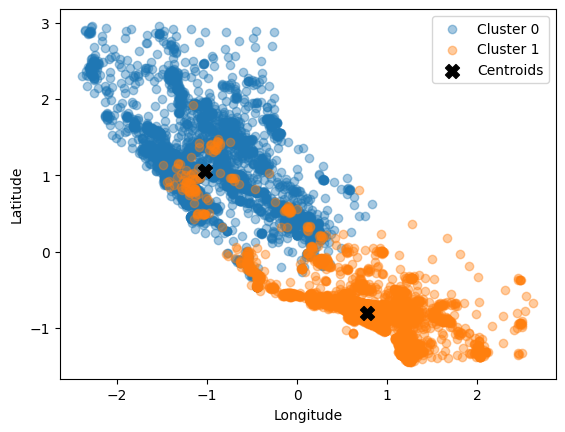

In [58]:
plot_clusters(kmean_2, centroids_2, clusters_2, housing_prepared)

In [ ]:
'''
As the plot above demonstrates, the clustering algorithm was able to roughly
separate the data into a northern cluster and a southern cluster. We can see
that the densest parts of the clusters were about where the centroids were as
we would expect. The darkest areas in the Northern part of the graph correspond
to the real world locations of San Francisco, San Jose, and Sacramento; meanwhile,
in the South the denser areas of points correspond to the Los Angeles and San
Diego areas. Some of the gaps between the clusters could be due to the geography
of California, with the Sierra Nevada mountains resulting in a sparser area in the
west of the graph. A reason for the separation between the clusters could also
be due to the differing nature of the economy between the regions, with the north
containing Silicon Valley and being generally more tech focused, while the south,
containing Hollywood and Los Angeles being more entertainment focused.
'''

In [63]:
# create lists to track k and inertia for elbow plot later
inertia_list = [0 for _ in range(9)]

inertia_list[0] = (kmean_2.get_sse(housing_prepared))

3 Clusters
SSE: 122226.85564019984
Centroid 0: 
[ 0.20061951 -0.17787196 -0.95004183  2.36190463  2.42245863  2.24029225
  2.42177453  0.19194841  0.14321482  0.46493813  0.35120801  0.
  0.08131998  0.10253388]
Standard Deviations for Cluster 0: 
[0.97459916 0.90489997 0.71714996 1.78579645 1.60999958 1.78580409
 1.58102872 0.94353467 0.94244848 0.49876915 0.47734782 0.
 0.27332588 0.30334912]
Centroid 1: 
[ 7.85986668e-01 -8.16535889e-01  9.33809886e-02 -2.14765344e-01
 -1.96489908e-01 -1.38842616e-01 -1.91598435e-01  2.79908771e-02
  8.11124654e-02  6.53053507e-01  1.88504443e-01  4.72679145e-04
  0.00000000e+00  1.57969370e-01]
Standard Deviations for Cluster 1: 
[0.36801142 0.25983476 0.92311239 0.50059149 0.53153988 0.57557945
 0.5315999  1.01895945 0.97725815 0.47599855 0.39111446 0.02173605
 0.         0.36471228]
Centroid 2: 
[-1.03462263  1.06863901  0.07464876 -0.20757494 -0.24296976 -0.27891199
 -0.24901651 -0.0743364  -0.13162501  0.1720263   0.47352062  0.
  0.2572624   0

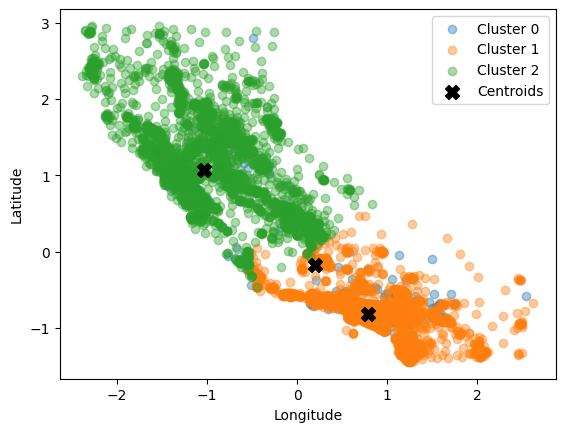

In [64]:
kmean_3 = MyKMeans(3)
centroids_3, clusters_3 = kmean_3.fit(housing_prepared)

print_values(kmean_3, centroids_3, clusters_3)
plot_clusters(kmean_3, centroids_3, clusters_3, housing_prepared)
inertia_list[1] = (kmean_3.get_sse(housing_prepared))

In [ ]:
'''
With 3 clusters, we see that Northern California remains roughly the same cluster but
Southern California has now split into two different clusters.
'''

4 Clusters
SSE: 107067.77244226511
Centroid 0: 
[ 8.06740634e-01 -8.11228290e-01  9.18479160e-02 -2.51646110e-01
 -1.74672400e-01 -9.33519353e-02 -1.72211985e-01 -2.98120935e-01
 -2.82008298e-01  6.24130460e-01  2.21690044e-01  4.56152355e-04
  0.00000000e+00  1.53723344e-01]
Standard Deviations for Cluster 0: 
[0.38236959 0.28433868 0.905201   0.48340706 0.55007761 0.5983035
 0.54864083 0.62437032 0.59564982 0.4843466  0.41538364 0.02135285
 0.         0.36068335]
Centroid 1: 
[-1.35554721e-02 -2.08611612e-01  9.46070172e-02  4.81704625e-02
 -2.05479522e-01 -2.63400179e-01 -1.83595939e-01  1.53317141e+00
  1.71840953e+00  6.10912634e-01  6.07340045e-02  3.24780773e-04
  1.42903540e-01  1.85125041e-01]
Standard Deviations for Cluster 1: 
[0.96116434 0.83102302 1.0327497  0.62780555 0.55258994 0.51419383
 0.56484071 1.1887217  0.71615008 0.48754322 0.23884176 0.01801875
 0.34997445 0.38839897]
Centroid 2: 
[ 0.18813945 -0.16015493 -0.97226893  2.46410288  2.54360724  2.35496692
  2.5412

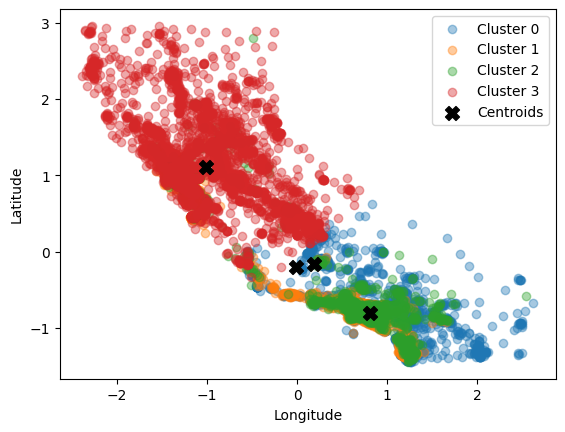

In [66]:
kmean_4 = MyKMeans(4)
centroids_4, clusters_4 = kmean_4.fit(housing_prepared)

print_values(kmean_4, centroids_4, clusters_4)
plot_clusters(kmean_4, centroids_4, clusters_4, housing_prepared)
inertia_list[2] = (kmean_4.get_sse(housing_prepared))

In [ ]:
'''
Northern California still remains a single cluster, but the extra cluster in Southern
California that emerged when k was set to 3 has further split into two clusters at
k = 4.
'''

5 Clusters
SSE: 99195.51585706182
Centroid 0: 
[ 6.78034472e-01 -8.00786761e-01 -4.97944158e-02  4.40288603e-02
 -1.73735639e-01 -2.31813234e-01 -1.57483458e-01  1.29933424e+00
  1.42953454e+00  7.64275256e-01  6.88140556e-02  1.09809663e-03
  3.66032211e-04  1.65446559e-01]
Standard Deviations for Cluster 0: 
[0.37069656 0.27566643 0.99372093 0.62071313 0.56407854 0.51341516
 0.56636549 1.18675588 0.82096947 0.42445093 0.25313767 0.03311934
 0.01912847 0.37158309]
Centroid 1: 
[ 8.09668226e-01 -8.13871841e-01  1.21879288e-01 -2.67224071e-01
 -1.71310083e-01 -8.08776732e-02 -1.70077318e-01 -3.69305485e-01
 -3.47880915e-01  6.16406056e-01  2.24993795e-01  2.48200546e-04
  0.00000000e+00  1.58351948e-01]
Standard Deviations for Cluster 1: 
[0.39233938 0.27526877 0.89948084 0.47740763 0.55805766 0.61259268
 0.555687   0.56818293 0.5299267  0.48626087 0.41757824 0.01575243
 0.         0.36507069]
Centroid 2: 
[-0.87230074  1.15389601 -0.14345509 -0.28606915 -0.28242426 -0.30672876
 -0.3092

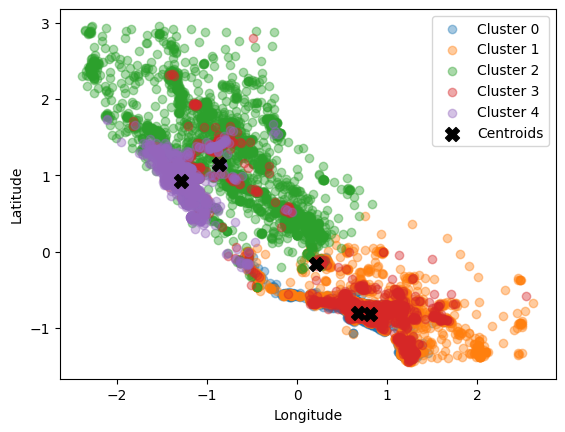

In [68]:
kmean_5 = MyKMeans(5)
centroids_5, clusters_5 = kmean_5.fit(housing_prepared)

print_values(kmean_5, centroids_5, clusters_5)
plot_clusters(kmean_5, centroids_5, clusters_5, housing_prepared)
inertia_list[3] = (kmean_5.get_sse(housing_prepared))

In [ ]:
'''
At 5 clusters, we now see Northern California split into roughly a San Francisco
cluster and a Sacramento cluster. The clusters in Southern California have shifted
with two now in the Los Angeles area and one being in northern SoCal.
'''

6 Clusters
SSE: 87383.14262718872
Centroid 0: 
[ 0.2101856  -0.21438901 -0.80916389  1.32819111  1.46999308  1.3474026
  1.47628347  0.00975864  0.03246126  0.49388254  0.32014682  0.
  0.06933116  0.11663948]
Standard Deviations for Cluster 0: 
[0.95051871 0.88164102 0.71659428 0.83493052 0.78383886 0.81830139
 0.75238602 0.78006711 0.82639331 0.49996258 0.46653278 0.
 0.25401643 0.3209902 ]
Centroid 1: 
[ 8.13275343e-01 -8.24879861e-01  2.02335850e-01 -3.48121550e-01
 -2.80049587e-01 -1.89025309e-01 -2.76720226e-01 -3.26462606e-01
 -2.97202651e-01  6.37656576e-01  2.04331942e-01  6.52400835e-04
  0.00000000e+00  1.57359081e-01]
Standard Deviations for Cluster 1: 
[0.38057847 0.26381004 0.87760376 0.39166813 0.44431382 0.50771978
 0.4467229  0.59908316 0.57650046 0.4806773  0.4032126  0.02553381
 0.         0.36413899]
Centroid 2: 
[-1.30950422  0.96107931  0.6774617  -0.21133309 -0.25553037 -0.30387796
 -0.23637304  0.25917743  0.58188181  0.25188083  0.04965393  0.
  0.52723443  0.1

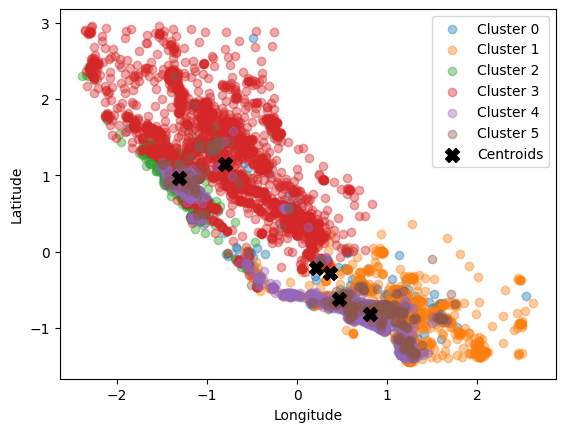

In [69]:
kmean_6 = MyKMeans(6)
centroids_6, clusters_6 = kmean_6.fit(housing_prepared)

print_values(kmean_6, centroids_6, clusters_6)
plot_clusters(kmean_6, centroids_6, clusters_6, housing_prepared)
inertia_list[4] = (kmean_6.get_sse(housing_prepared))

In [ ]:
'''
Adding a 6th cluster seemingly results in similar clustering to 5 clusters. The
cluster that was lost going from k=4 to k=5 has returned and the two clusters
near Los Angeles have separated slightly.
'''

7 Clusters
SSE: 82384.28982504834
Centroid 0: 
[ 0.33148645 -0.25988221 -1.21880792  4.55285086  4.48115048  4.22040105
  4.44051717  0.28954211  0.10440085  0.42307692  0.42548077  0.
  0.06971154  0.08173077]
Standard Deviations for Cluster 0: 
[0.94662898 0.88116531 0.68695103 2.29000563 1.94345809 2.49592876
 1.94258808 0.84946798 0.88246546 0.49404741 0.4944157  0.
 0.25466024 0.2739541 ]
Centroid 1: 
[ 0.84568296 -0.81987844 -0.67771138  0.80713942  0.99119656  0.95341236
  0.98234504 -0.10827246 -0.05594461  0.59206349  0.26230159  0.
  0.          0.14563492]
Standard Deviations for Cluster 1: 
[0.36321664 0.26862486 0.7416853  0.71849892 0.72152351 0.76417014
 0.68805443 0.70485016 0.75433    0.49145123 0.43988574 0.
 0.         0.35273983]
Centroid 2: 
[-1.32024747  0.97782428  0.8702376  -0.32506568 -0.35800945 -0.40447404
 -0.34453909  0.16335491  0.51356215  0.21988264  0.0517777   0.
  0.55885399  0.16948567]
Standard Deviations for Cluster 2: 
[0.19061084 0.24356571 0.85

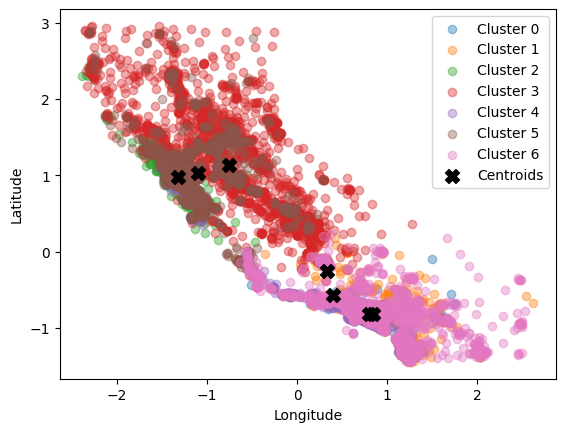

In [70]:
kmean_7 = MyKMeans(7)
centroids_7, clusters_7 = kmean_7.fit(housing_prepared)

print_values(kmean_7, centroids_7, clusters_7)
plot_clusters(kmean_7, centroids_7, clusters_7, housing_prepared)
inertia_list[5] = (kmean_7.get_sse(housing_prepared))

In [ ]:
'''
Largely the same as k=6 except a third cluster has appeared in Northern California
between where the two clusters that were there before.
'''

8 Clusters
SSE: 76465.25449797335
Centroid 0: 
[ 0.02441178 -0.02840032 -0.89498857  1.95023583  2.0607602   1.85647707
  2.06339876  0.14321493  0.13977381  0.4568902   0.34119381  0.
  0.10169492  0.10022108]
Standard Deviations for Cluster 0: 
[1.00351068 0.93411226 0.70611804 0.8927231  0.84385857 0.88647657
 0.77351204 0.86809107 0.90039998 0.49813808 0.47411032 0.
 0.30224669 0.30029454]
Centroid 1: 
[ 0.85302957 -0.83395971 -0.53558246  0.27907191  0.42615795  0.46528965
  0.42470043 -0.22939391 -0.22596292  0.55247769  0.26500462  0.
  0.          0.1825177 ]
Standard Deviations for Cluster 1: 
[0.4124274  0.30356037 0.74871876 0.4532525  0.48095743 0.59350519
 0.46487083 0.62023037 0.59896687 0.49723847 0.44133567 0.
 0.         0.38627061]
Centroid 2: 
[ 0.32547709 -0.26521497 -1.3880136   6.11526526  5.81648375  5.69221993
  5.83891269  0.41478062  0.15849144  0.44559585  0.38860104  0.
  0.07253886  0.09326425]
Standard Deviations for Cluster 2: 
[0.95266486 0.907647   0.58

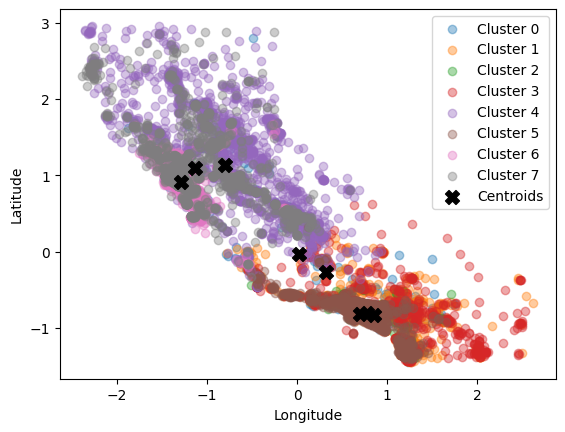

In [71]:
kmean_8 = MyKMeans(8)
centroids_8, clusters_8 = kmean_8.fit(housing_prepared)

print_values(kmean_8, centroids_8, clusters_8)
plot_clusters(kmean_8, centroids_8, clusters_8, housing_prepared)
inertia_list[6] = (kmean_8.get_sse(housing_prepared))

In [ ]:
'''
At k=8, a third cluster emerges in the Los Angeles area, suggesting that there
are possibly 3 distinct neighborhoods or areas in Los Angeles.
'''

9 Clusters
SSE: 73181.94810179883
Centroid 0: 
[ 0.02040333 -0.02071213 -0.91349125  1.99242728  2.09744031  1.88993778
  2.10261325  0.13573173  0.12085542  0.45532246  0.34887335  0.
  0.0994561   0.0963481 ]
Standard Deviations for Cluster 0: 
[1.00491542 0.93954144 0.70006692 0.88382105 0.84661663 0.88490964
 0.7697206  0.83659919 0.88479226 0.49799992 0.47661382 0.
 0.29927343 0.29506803]
Centroid 1: 
[-1.29682855  0.9274494   0.32640837 -0.01349784 -0.11121148 -0.17330144
 -0.08016791  0.6233849   1.00779883  0.31239243  0.04991394  0.
  0.43545611  0.20223752]
Standard Deviations for Cluster 1: 
[0.16385397 0.20067384 0.99068408 0.52473242 0.55341296 0.53713991
 0.57069129 0.73006392 0.74536511 0.46346888 0.21776717 0.
 0.49581659 0.4016684 ]
Centroid 2: 
[-1.09844125  1.11770022  0.95850719 -0.53091607 -0.50904605 -0.52638504
 -0.51955516 -0.58997722 -0.61926553  0.11119936  0.46108022  0.
  0.3542494   0.07347101]
Standard Deviations for Cluster 2: 
[0.46958636 0.45584971 0.62

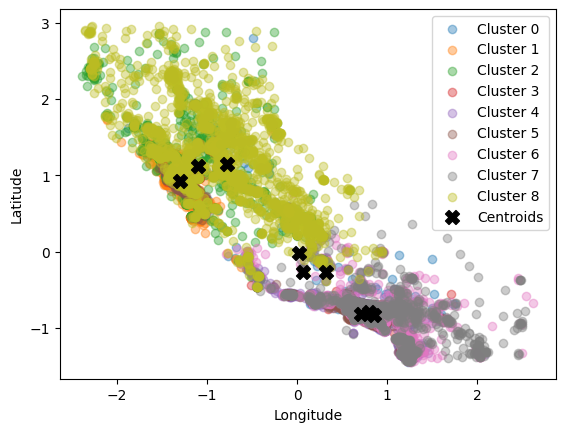

In [72]:
kmean_9 = MyKMeans(9)
centroids_9, clusters_9 = kmean_9.fit(housing_prepared)

print_values(kmean_9, centroids_9, clusters_9)
plot_clusters(kmean_9, centroids_9, clusters_9, housing_prepared)
inertia_list[7] = (kmean_9.get_sse(housing_prepared))

In [ ]:
'''
At k=9 there are 3 distinct groups of clusters: 3 clusters in Northern California,
3 clusters in Southern California in the Los Angeles area, and 3 clusters in the
northern part of Southern California. This suggests that these groups of clusters
have similarities to each other, but can be further broken down into smaller
groups.
'''

10 Clusters
SSE: 69658.1593330285
Centroid 0: 
[ 0.70175176 -0.82655608  0.0376846   0.12150276 -0.20554165 -0.25738478
 -0.19124143  2.03601623  2.03572416  0.75837743  0.05908289  0.
  0.          0.18253968]
Standard Deviations for Cluster 0: 
[0.27355016 0.19378566 1.01999814 0.64510969 0.51557414 0.48548141
 0.52405056 1.23910769 0.60367205 0.42806671 0.23577978 0.
 0.         0.38628868]
Centroid 1: 
[ 0.85965708 -0.83050609 -0.58194623  0.43097157  0.60906772  0.63121488
  0.60356491 -0.22678526 -0.19340179  0.56278904  0.26538598  0.
  0.          0.17182497]
Standard Deviations for Cluster 1: 
[0.37941671 0.29524759 0.74748781 0.50005262 0.5220871  0.62294482
 0.50121232 0.62443782 0.65648694 0.49604187 0.44153852 0.
 0.         0.37722825]
Centroid 2: 
[ 0.26286664 -0.23581012 -0.96770709  2.41361362  2.53224742  2.30120999
  2.52348735  0.17048641  0.12089649  0.47337963  0.36226852  0.
  0.0775463   0.08680556]
Standard Deviations for Cluster 2: 
[0.94382935 0.86765569 0.69

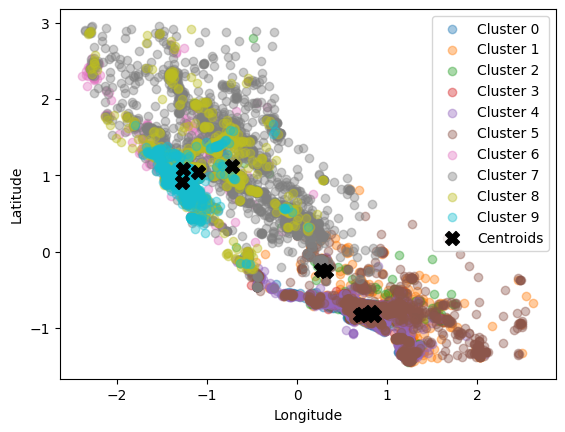

In [73]:
kmean_10 = MyKMeans(10)
centroids_10, clusters_10 = kmean_10.fit(housing_prepared)

print_values(kmean_10, centroids_10, clusters_10)
plot_clusters(kmean_10, centroids_10, clusters_10, housing_prepared)
inertia_list[8] = (kmean_10.get_sse(housing_prepared))

In [ ]:
'''
At k=10, a 4th cluster emerged in the San Francisco, San Jose area. This is likely
to be the clusters mentioned in the writeup around Silicon Valley and San Francisco,
with the southern and northern clusters belonging to the regions respectively.
A lot of the clusters overlap when plotted on longitude and latitude, suggesting
that these are clustered around non-geographical features. In the case of the
SF and SV clusters, however, these are likely clustered due to their geographical
location as they should otherwise be economically similar.
'''

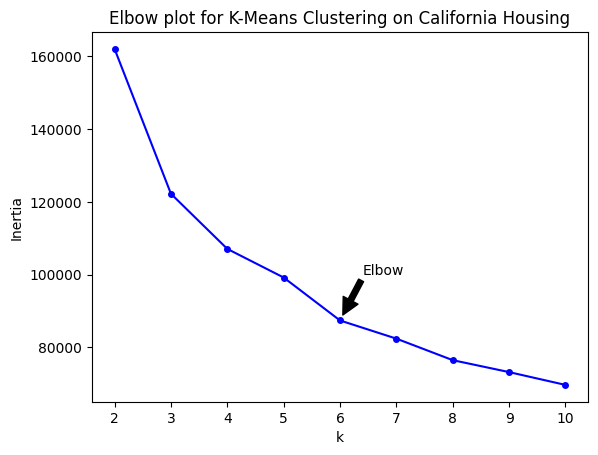

In [97]:
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(k_values, inertia_list, "bo-", markersize=4)
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow plot for K-Means Clustering on California Housing")

plt.annotate("Elbow", xy=(6.05, inertia_list[4] + 1500), xytext=(6.4, 100000),
             arrowprops=dict(facecolor='black'))
plt.show()

In [ ]:
'''
Based on this elbow plot, some options for ideal k values would be 5, 6, or 7.
Analyzing this graph, we can see that from 5 to 6, there is still a significant
drop in inertia while form 6 to 7 and onward it becomes more constant of a drop
in inertia. This helps suggest that the ideal k value for this dataset would be
6.
'''

- - -
## 4. WRITING ON THE INTUITION FOR THE CALIFORNIA HOUSING CRISIS (10 pts)

This question is a qualitative one, and is intended to let you experiment with a real world clustering task. Hopefully it gives you some intuition as for how the preset number of clusters affects the clustering results. Too few clusters may not reveal the information that is in the data. Too many clusters may hurt data analysis as well, as it may not generalize (and in this sense, it is equivalent to over fitting).

Write at least one paragraph to demonstrate your intuition on the California Housing Crisis. You might also want to mention some possible solutions to solve it. You will receive credits based upon your insights and intuitions on this challenge.



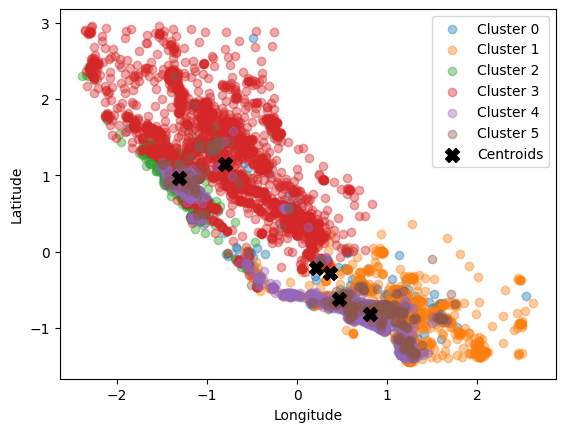

In [98]:
plot_clusters(kmean_6, centroids_6, clusters_6, housing_prepared)

In [ ]:
'''
From analyzing the elbow plot earlier, we came to the conclusion that the ideal
number of clusters for this dataset is 6. In the graph above where we plotted
the result of clustering around 6 means, we can see that although California as
a state is massive, the clusters are only located around 2, possibly 3 areas.
While the San Francisco, Sacramento, and Los Angeles regions are likely the most
populated regions in California, due to the geographical size of California state,
focusing housing around just those areas is undoubtedly insufficient. By looking
at the points slightly further from the clusters, we can see that although they
are sparse, there are many many data points outside of the cluster areas. And with
the vast size of California, these make up a lot of area and likely affect a lot
of people. I believe that trying to apply a more concentrated effort to house those
that live outside of the metropolitan areas of California would significantly
improve the conditions of the housing crisis in California. I also believe that
trying to expand the amount of housing around the metropolitan areas will also
help those that already live there under likely exorbitant pricing schemes.
'''

- - -
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my lectures and/or the textbook
 * Talk to the TA, they are available and there to help you during their OH.
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 2:...".

Best of luck and have fun!